<a href="https://colab.research.google.com/github/minjeon99/ESAA-10th/blob/Week13/w13_mon_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **07. 군집화**

## **03 평균 이동**

### **평균 이동(Mean Shift)의 개요**

평균 이동(Mean Shift)은 K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화 수행
- K-평균: 중심에 소속된 데이터의 평균 거리 중심으로 이동
- 평균 이동: 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동

**평균 이동 군집화**
- 데이터의 분포도를 이용해 군집 중심점 찾기
  - **군집 중심점**: 데이터 포인트가 모여 있는 곳 -> 확률 밀도 함수(probability density function) 이용
    - 가장 집중적으로 데이터가 모여 있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정
    - 주어진 모델의 확률 밀도 함수를 찾기 위해 KDE(Kernel Density Estimation) 이용

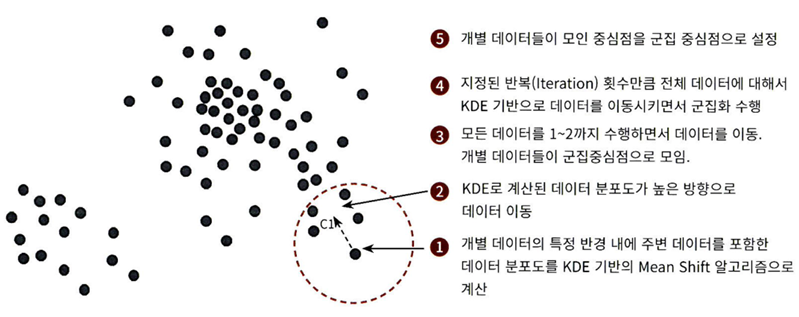

**과정**

특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력

  -> 반환 값을 현재 위치에서 업데이트하면서 이동

  -> 전체 데이터에 반복적으로 적용하며 데이터의 군집 중심점 찾음
1. 개별 데이터의 특정 반경 내에 주변 데이터를 포함한 데이터 분포도를 KDE 기반의 Mean Shift 알고리즘으로 계산
2. KDE로 계산된 데이터 분포도가 높은 방향으로 데이터 이동
3. 모든 데이터를 1~2까지 수행하면서 데이터 이동. 개별 데이터들이 군집 중심점으로 모임
4. 지정된 반복(iteration) 횟수만큼 전체 데이터에 대해 KDE 기반으로 데이터 이동시키면서 군집화 수행
5. 개별 데이터들이 모인 중심점을 군집 중심점으로 설

**KDE(Kernel Density Estimation)**: 커널(Kernel) 함수를 통해 어떤 변수의 확률 밀도를 추정하는 대표적인 방법
- 관측된 데이터 각각에 커널 함수 적용 -> 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정
- 커널 함수로서 대표적으로 가우시안 분포 함수 사용
- 확률 밀도 함수 PDF(Probability Density Function): 확률 변수의 분포를 나타내는 함수
  - 정규분포 함수, 감마 분포, t- 분포 등
  - 특정 변수가 어떤 값을 갖게 될지에 대한 확률을 알게 되므로 변수의 특성(정규분포의 경우 평균, 분산), 확률 분포 등 변수의 많은 요소 알 수 있음

  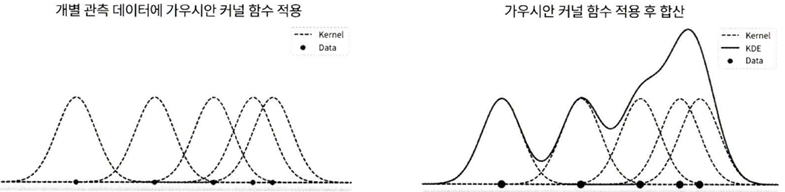

- KDE는 다음과 같은 커널 함수식으로 표현
  - K: 커널 함수, x: 확률 변수값, xi: 관측값, h: 대역폭(bandwidth)
  
  KDE = $\displaystyle \frac{1}{n}\sum^n_{i=1}K_h(x-x_i)=\frac{1}{nh}\sum^n_{i=1}K(\frac{x-x_i}{h})$
  - h: KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(Smoothing) 하는 데 적용
    - 확률 밀도 추정 성능을 크게 좌우

  **h값에 따른 KDE 변화**
  - 작은 h값 (h=1.0): 좁고 뾰족한 KDE, 변동성이 큰 방식 => 과적합하기 쉬움
  - 큰 h값 (h=10): 과도화게 평활화(smoothing)된 KDE -> 지나치게 단순화된 방식으로 확률 밀도 함수 추정 => 과소적합하기 쉬움
  - 적절한 KDE의 대역폭 h 계산이 KDE 기반 평균 이동 군집화에서 매우 중요

  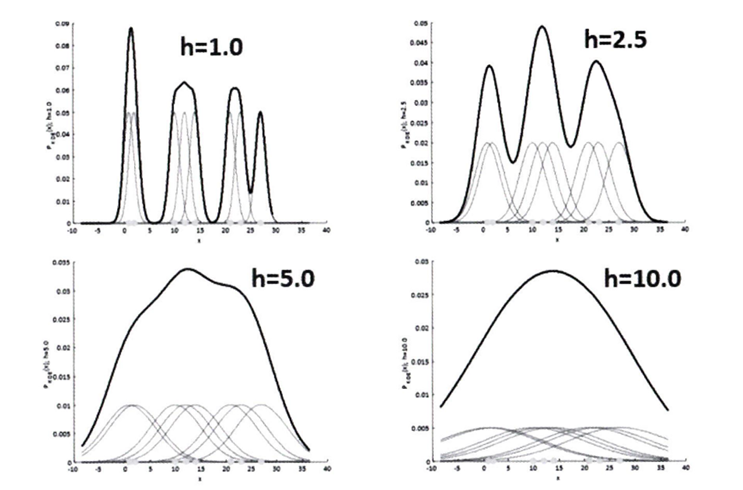



- 일반적으로 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점 가짐, 대역폭 적을수록 많은 수의 군집 중심점 가짐
- 평균 이동 군집화는 군집의 개수를 지정하지 않으며, 대역폭의 크기에 따라 군집화 수행
- 사이킷런의 `MeanShift` 클래스
  - 초기화 파라미터 `bandwidth`: KDE의 대역폭 h
  - 최적의 대역폭 계산을 위한 `estimate_bandwidth()` 함수 제공

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


- 6개의 군집으로 분류 -> 지나치게 세분화됨

In [3]:
# bandwidth=1.0으로 살짝 높여서 수행
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- 3개의 군집으로 잘 군집화

**최적화된 bandwidth 값 찾기**

In [4]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.816


**최적화된 bandwidth로 군집화 다시 수행**

In [5]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


**시각화**

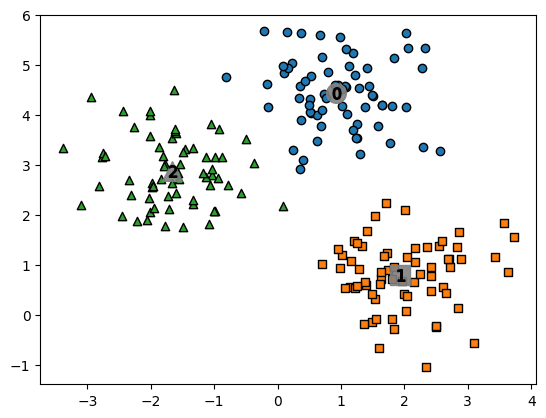

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
  label_cluster = clusterDF[clusterDF['meanshift_label']==label]
  center_x_y = centers[label]

  # 군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  # 군집별 중심 표현
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$'%label)

**target 값과 군집 label 값 비교**

In [7]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


**평균 이동의 장점**
- 데이터 세트를 특정 형태로 가정하거나, 특정 분포도 기반의 모델로 가정하지 않기 때문에 유연한 군집화 가능
- 이상치의 영향력 크지 않음
- 군집의 개수를 미리 정할 필요 없음

**평균 이동의 단점**
- 알고리즘의 수행 시간이 오래 걸림
- bandwidth 크기에 따른 군집화 영향도가 매우 큼

**사용 분야**
- 분석 업무 기반의 데이터 세트보다는 컴퓨터 비전 영역에서 더 많이 사용
- 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임 추정하는 데 뛰어난 역할 수행

## **04 GMM(Gaussian Mixture Model)**

### **GMM(Gaussian Mixture Model) 소개**

군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식

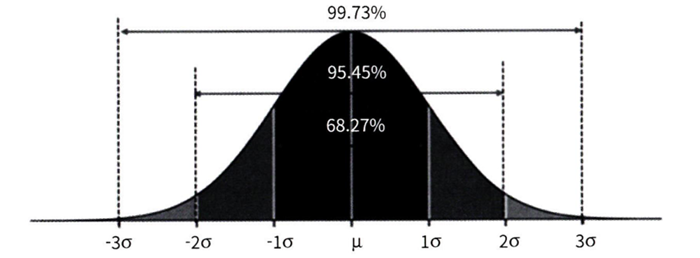
- **가우시안 분포**(Gaussian Distribution)=**정규 분포**(Normal distribution): 좌우 대칭형의 종(Bell) 형태
  - 통계학에서 가장 잘 알려진 연속 확률 함수
  - 평균 μ를 중심으로 높은 데이터 분포도를 가짐
  - 좌우 표준편차 1에 전체 데이터의 68.27%, 좌우 표준편차 2에 전체 데이터의 95.45% 가짐
  - **표준 정규 분포**: 평균=0, 표준편차=1인 정규 분포

GMM은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주, 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출

- 가우시안 분포를 가진 3개의 데이터 세트 A. B, C

  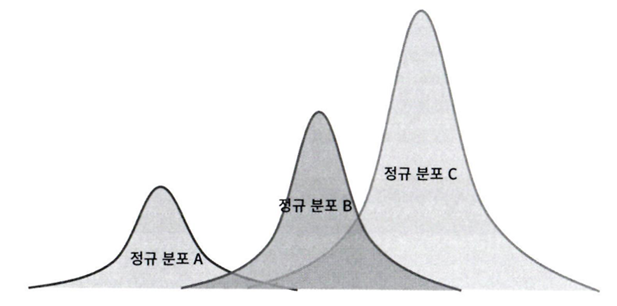
- 3개의 정규 분포를 합친 형태

  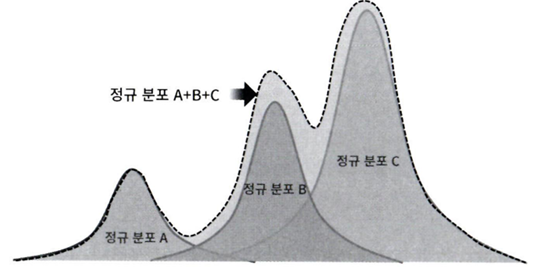
- 실제 데이터 세트의 데이터 분포도가 다음과 같다면, 정규분포 A, B, C가 합쳐진 데이터 분포도임을 알 수 있음

  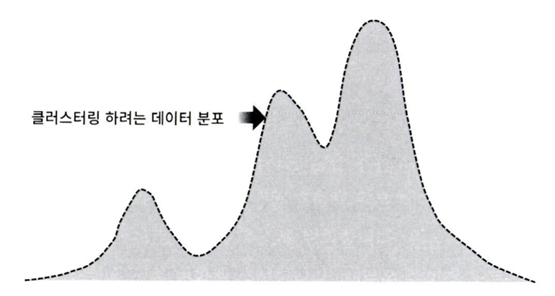

전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있음

이에 기반해 군집화를 수행하는 것이 GMM 군집화 방식
- e.g. 1000개의 데이터 세트 -> 이를 구성하는 여러 개의 정규 분포 곡선을 추출 -> 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정
  
  : GMM에서의 **모수 추정**

  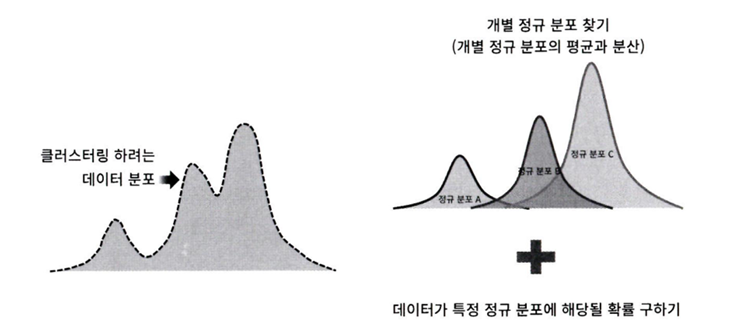

**모수 추정**
- 대표적으로 2가지를 추정하는 것
  - 개별 정규 분포의 평균과 분산
  - 각 데이터가 어떤 정규 분포에 해당되는지의 확률
- 모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법 적용
- `GaussianMixture` 클래스: 사이킷런에서 지원하는 GMM의 EM 방식을 통한 모수 추정 군집화

### **GMM을 이용한 붓꽃 데이터 세트 군집화**

- GMM: 확률 기반 군집화
- K-평균: 거리 기반 군집화

**두 가지 방식을 이용한 군집화 수행 후 비교**

In [8]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 핸들링을 위해 DataFrame 변화
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

- `n_components`: GaussianMixture 객체의 가장 중요한 초기화 파라미터
  - K-평균의 n_clusters와 같이 군집의 개수를 정하는 데 중요한 역할 수행

In [9]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster' 칼럼 명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑되는지 확인
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: count, dtype: int64


In [10]:
# K-평균 군집화 수행 결과
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


어떤 알고리즘이 더 뛰어나다는 의미는 아님
- 붓꽃 데이터 세트는 GMM 군집화가 더 효과적
- K-평균은 평균 거리 중심으로 중심을 이동하며 수행 => 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우 매우 효과적으로 군집화 수행

### **GMM과 K-평균의 비교**

KMeans는 원형의 범위에서 군집화 수행

=> 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율은 더 높아짐

  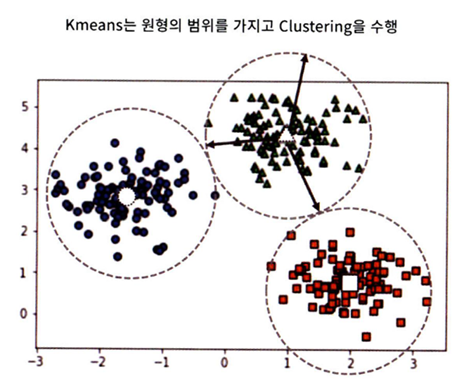
- make_blobs()에서 cluster_std=0.5로 설정해 군집 내의 데이터를 뭉치게 유도하고 KMeans 적용한 결과 => 효과적

데이터가 원형이 아닌 경우의 KMeans
- 대표적으로 데이터가 길쭉한 타원형인 경우 군집화를 잘 수행하지 못함

In [11]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

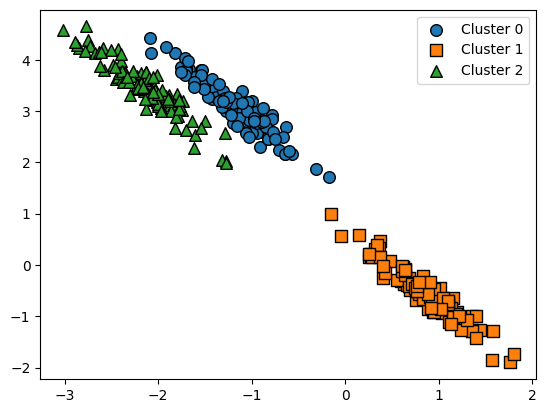

In [12]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# 생성된 데이터 세트를 target 별로 다른 마커로 표시해 시각화
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

- 이렇게 만들어진 데이터 세트에서는 KMeans의 군집화 정확성이 떨어짐

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


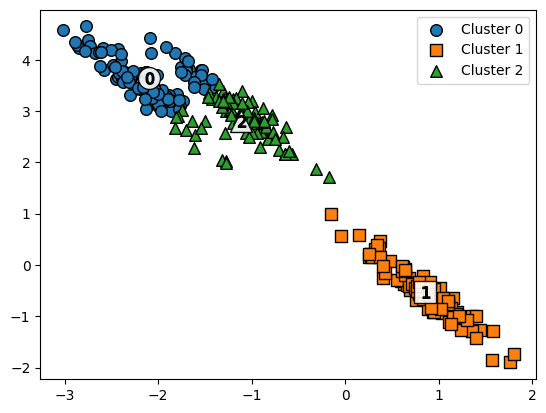

In [14]:
# 3개의 군집 기반 KMeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

- 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 수행되지 않음

**GMM**

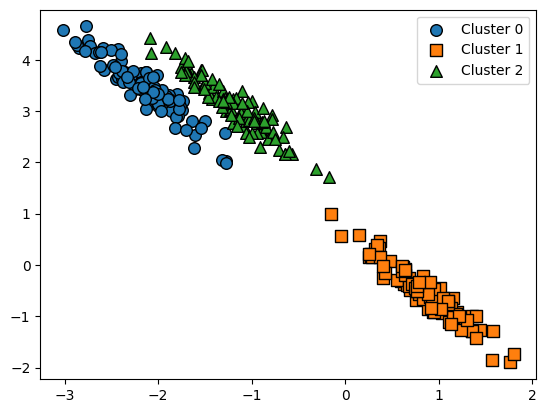

In [15]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

- 데이터가 분포된 방향에 따라 정확하게 군집화
- GMM은 K-평균과 다르게 군집의 중심 좌표를 구할 수 없기 때문에 군집 중심 표현이 visualize_cluster_plot()에서 시각화되지 않음

**target 값과 KMeans, GMM의 Label 값 비교**

In [17]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64


- GMM은 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점이 있지만

  군집화를 위한 수행 시간이 오래 걸리는 단점